In [1]:
# import 'numpy' to compute high-level mathematics functions 
import numpy as np

# import 'pandas' to perform data manipulation
import pandas as pd

# import 'matplotlib.pyplot' for visualization
import matplotlib.pyplot as plt

# import 'seaborn' for high-level statistical graphics
import seaborn as sns



# run below code to convert the 'exponential' values to float
np.set_printoptions(suppress = True)

# import functions from sklearn to perform clustering
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score 



In [2]:
df_health = pd.read_csv("/Users/swatiraman/Downloads/drive-download-20210428T114902Z-001/df.csv")
df_health.head()

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,...,DRD340,DRD360,URXUMA,URXUMS,URXUCR.x,URXCRS,URDACT,LBXSAL,LBDSALSI,LBXSAPSI
0,73557,8,2,1,69,NaN,4,4,1,NaN,...,6.586219,-6.527018,9.182882,-9.018023,-6.181923,5.151193,-9.708139,2.814690,-2.712184,-6.811191
1,73558,8,2,1,54,NaN,3,3,1,NaN,...,-9.588554,1.863741,-9.378731,8.289190,-2.561066,-3.755943,1.406037,7.590942,0.480820,-4.636475
2,73559,8,2,1,72,NaN,3,3,2,NaN,...,-5.229054,6.379788,-9.433054,-9.285869,9.248429,-7.439368,8.374918,8.401561,-9.936335,0.913262
3,73560,8,2,1,9,NaN,3,3,1,119.0,...,7.428271,-1.193575,6.972074,-0.257756,-5.087773,8.581422,4.767615,9.760521,-4.708915,7.624684
4,73561,8,2,2,73,NaN,3,3,1,NaN,...,2.125105,-2.906226,1.977286,-1.322955,-1.034636,6.702919,-1.735375,-4.799543,1.194572,-7.098007


In [3]:
for i in df_health.columns:
    if (df_health[i].isnull().sum() > 100):
        df_health.drop(i,axis=1,inplace=True)

In [4]:
for i in df_health.columns:
    if (df_health[i].isnull().sum() > 0 ):
        #df[i].fillna(df[i].median,inplace=True)
        print(i,'contain almost all null values',df_health[i].isnull().sum())

DMDCITZN contain almost all null values 4
SIAPROXY contain almost all null values 1


In [5]:
df_health.columns

Index(['SEQN', 'SDDSRVYR', 'RIDSTATR', 'RIAGENDR', 'RIDAGEYR', 'RIDRETH1',
       'RIDRETH3', 'RIDEXMON', 'DMDBORN4', 'DMDCITZN', 'SIALANG', 'SIAPROXY',
       'SIAINTRP', 'DMDHHSIZ', 'DMDFMSIZ', 'DMDHHSZA', 'DMDHHSZB', 'DMDHHSZE',
       'DMDHRGND', 'DMDHRAGE', 'WTINT2YR', 'WTMEC2YR', 'SDMVPSU', 'SDMVSTRA',
       'WTDRD1', 'DR1DRSTZ', 'DR1TALCO', 'DR1TMOIS', 'DR1TS040', 'DR1TS060',
       'DR1TS080', 'DR1TS100', 'DR1TS120', 'DR1TS140', 'DR1TS160', 'DR1TS180',
       'DR1TM161', 'DR1TM181', 'DR1TM201', 'DR1TM221', 'DR1TP182', 'DR1TP183',
       'DR1TP184', 'DR1TP204', 'DR1TP205', 'DR1TP225', 'DR1TP226', 'DR1.300',
       'DR1.320Z', 'DR1.330Z', 'DR1BWATZ', 'DR1TFA', 'DR1TFF', 'DR1TFDFE',
       'DR1TCHL', 'DR1TVB12', 'DR1TB12A', 'DR1TVC', 'DR1TVD', 'DR1TVK',
       'DR1TCALC', 'DR1TPHOS', 'DR1TMAGN', 'DR1TIRON', 'DR1TZINC', 'DR1TCOPP',
       'DR1TSODI', 'DR1TPOTA', 'DR1TSELE', 'DR1TCAFF', 'DR1TTHEO', 'DRD340',
       'DRD360', 'URXUMA', 'URXUMS', 'URXUCR.x', 'URXCRS', 'URDACT', 'LBXS

In [6]:
corr_matrix = df_health[[ 'RIAGENDR', 'RIDAGEYR', 'RIDRETH1',
       'RIDRETH3', 'RIDEXMON', 'DMDBORN4', 'DMDCITZN', 'SIALANG', 'SIAPROXY',
       'SIAINTRP', 'DMDHHSIZ', 'DMDFMSIZ', 'DMDHHSZA', 'DMDHHSZB', 'DMDHHSZE',
       'DMDHRGND', 'DMDHRAGE', 'WTINT2YR', 'WTMEC2YR', 'SDMVPSU', 'SDMVSTRA',
       'WTDRD1', 'DR1DRSTZ', 'DR1TALCO', 'DR1TMOIS', 'DR1TS040', 'DR1TS060',
       'DR1TS080', 'DR1TS100', 'DR1TS120', 'DR1TS140', 'DR1TS160', 'DR1TS180',
       'DR1TM161', 'DR1TM181', 'DR1TM201', 'DR1TM221', 'DR1TP182', 'DR1TP183',
       'DR1TP184', 'DR1TP204', 'DR1TP205', 'DR1TP225', 'DR1TP226', 'DR1.300',
       'DR1.320Z', 'DR1.330Z', 'DR1BWATZ', 'DR1TFA', 'DR1TFF', 'DR1TFDFE',
       'DR1TCHL', 'DR1TVB12', 'DR1TB12A', 'DR1TVC', 'DR1TVD', 'DR1TVK',
       'DR1TCALC', 'DR1TPHOS', 'DR1TMAGN', 'DR1TIRON', 'DR1TZINC', 'DR1TCOPP',
       'DR1TSODI', 'DR1TPOTA', 'DR1TSELE', 'DR1TCAFF', 'DR1TTHEO', 'DRD340',
       'DRD360', 'URXUMA', 'URXUMS', 'URXUCR.x', 'URXCRS', 'URDACT', 'LBXSAL',
       'LBDSALSI', 'LBXSAPSI']].corr()

In [7]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

In [8]:
to_drop = [column for column in upper.columns if any(upper[column] > 0.75)]

In [9]:
to_drop

['RIDRETH3', 'SIAPROXY', 'DMDFMSIZ', 'WTMEC2YR', 'WTDRD1']

In [10]:
to_drop_1 = [column for column in upper.columns if any(upper[column] < -0.75)]
print(to_drop_1)

['DRD360']


In [11]:
df_health.drop(to_drop,axis=1,inplace=True)

In [12]:
df_health.drop(to_drop_1,axis=1,inplace=True)

In [13]:
df_health.std()==True

SEQN        False
SDDSRVYR    False
RIDSTATR    False
RIAGENDR    False
RIDAGEYR    False
            ...  
URXCRS      False
URDACT      False
LBXSAL      False
LBDSALSI    False
LBXSAPSI    False
Length: 75, dtype: bool

In [14]:
for i in df_health.columns:
    if len(df_health[i].unique()) == 1:
        print(i)
        df_health.drop(i,axis=1,inplace=True)

SDDSRVYR
RIDSTATR


In [15]:
df_health.shape

(9813, 73)

In [16]:
from sklearn.feature_selection import VarianceThreshold
# define the transform
transform = VarianceThreshold()
# transform the input data
X_sel = transform.fit_transform(df_health)
print(X_sel.shape)

(9813, 73)


In [17]:
# define thresholds to check
thresholds = np.arange(0.0, 0.55, 0.05)

In [18]:

# apply transform with each threshold
results = list()
for t in thresholds:
    # define the transform
    transform = VarianceThreshold(threshold=t)
    # transform the input data
    X_sel = transform.fit_transform(df_health)
    # determine the number of input features
    n_features = X_sel.shape[1]
    print('>Threshold=%.2f, Features=%d' % (t, n_features))
    # store the result
    results.append(n_features)

>Threshold=0.00, Features=73
>Threshold=0.05, Features=72
>Threshold=0.10, Features=71
>Threshold=0.15, Features=70
>Threshold=0.20, Features=70
>Threshold=0.25, Features=66
>Threshold=0.30, Features=66
>Threshold=0.35, Features=66
>Threshold=0.40, Features=66
>Threshold=0.45, Features=66
>Threshold=0.50, Features=65


In [19]:
transform = VarianceThreshold(threshold=0.25)
X_sel = transform.fit_transform(df_health)

In [20]:
X_sel

array([[73557.        ,    69.        ,     4.        , ...,
            2.81468996,    -2.71218366,    -6.81119087],
       [73558.        ,    54.        ,     3.        , ...,
            7.59094222,     0.48081989,    -4.63647541],
       [73559.        ,    72.        ,     3.        , ...,
            8.40156149,    -9.93633474,     0.91326168],
       ...,
       [83729.        ,    42.        ,     4.        , ...,
           -3.40514592,     0.90809563,    -4.4855898 ],
       [83730.        ,     7.        ,     2.        , ...,
            6.66962833,     6.19323141,     3.3011373 ],
       [83731.        ,    11.        ,     5.        , ...,
           -8.83675969,    -6.49697735,    -3.899468  ]])

In [21]:
for i in df_health.columns:
    print(i,len(df_health[i].unique()))

SEQN 9813
RIAGENDR 2
RIDAGEYR 81
RIDRETH1 5
RIDEXMON 2
DMDBORN4 3
DMDCITZN 5
SIALANG 2
SIAINTRP 2
DMDHHSIZ 7
DMDHHSZA 4
DMDHHSZB 5
DMDHHSZE 4
DMDHRGND 2
DMDHRAGE 63
WTINT2YR 6861
SDMVPSU 2
SDMVSTRA 15
DR1DRSTZ 4
DR1TALCO 9813
DR1TMOIS 9813
DR1TS040 9813
DR1TS060 9813
DR1TS080 9813
DR1TS100 9813
DR1TS120 9813
DR1TS140 9813
DR1TS160 9813
DR1TS180 9813
DR1TM161 9813
DR1TM181 9813
DR1TM201 9813
DR1TM221 9813
DR1TP182 9813
DR1TP183 9813
DR1TP184 9813
DR1TP204 9813
DR1TP205 9813
DR1TP225 9813
DR1TP226 9813
DR1.300 9813
DR1.320Z 9813
DR1.330Z 9812
DR1BWATZ 9812
DR1TFA 9813
DR1TFF 9813
DR1TFDFE 9813
DR1TCHL 9813
DR1TVB12 9813
DR1TB12A 9813
DR1TVC 9813
DR1TVD 9813
DR1TVK 9813
DR1TCALC 9813
DR1TPHOS 9813
DR1TMAGN 9812
DR1TIRON 9813
DR1TZINC 9813
DR1TCOPP 9813
DR1TSODI 9813
DR1TPOTA 9813
DR1TSELE 9813
DR1TCAFF 9813
DR1TTHEO 9812
DRD340 9813
URXUMA 9812
URXUMS 9812
URXUCR.x 9812
URXCRS 9813
URDACT 9813
LBXSAL 9813
LBDSALSI 9813
LBXSAPSI 9813


In [22]:
df_health.shape

(9813, 73)

In [23]:
df_health.describe()

,SEQN,RIAGENDR,RIDAGEYR,RIDRETH1,RIDEXMON,DMDBORN4,DMDCITZN,SIALANG,SIAINTRP,DMDHHSIZ,...,DR1TTHEO,DRD340,URXUMA,URXUMS,URXUCR.x,URXCRS,URDACT,LBXSAL,LBDSALSI,LBXSAPSI
count,9813.000000,9813.000000,9813.000000,9813.000000,9813.000000,9813.000000,9809.000000,9813.000000,9813.000000,9813.000000,...,9813.000000,9813.000000,9813.000000,9813.000000,9813.000000,9813.000000,9813.000000,9813.000000,9813.000000,9813.000000
mean,78644.559971,1.507694,31.629573,3.083766,1.508509,1.219709,1.098787,1.106491,1.965964,3.880465,...,-0.759246,-1.734956,-0.711343,0.820030,0.511885,2.087264,1.037003,2.810665,-0.255001,-0.679591
std,2938.592266,0.499966,24.397553,1.262812,0.499953,1.579601,0.344094,0.308481,0.181332,1.724762,...,5.269205,6.665694,5.514023,4.847528,5.927111,5.582975,6.174046,5.767382,4.868527,5.174773
min,73557.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,-10.014475,-9.998027,-9.759888,-10.001466,-9.665313,-9.835496,-9.739738,-8.885937,-9.968040,-9.516987
25%,76092.000000,1.000000,10.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,...,-3.707880,-8.764742,-4.772251,-2.817109,-5.081807,-2.314521,-4.252078,-2.047854,-4.709602,-4.487764
50%,78643.000000,2.000000,27.000000,3.000000,2.000000,1.000000,1.000000,1.000000,2.000000,4.000000,...,-1.614540,-4.423152,-1.379131,-0.259016,-1.039955,3.390824,4.159020,4.867756,-0.504415,-2.959643
75%,81191.000000,2.000000,52.000000,4.000000,2.000000,1.000000,1.000000,1.000000,2.000000,5.000000,...,2.172646,7.025565,3.293431,5.817885,5.847951,6.708240,6.299989,8.099925,3.973927,3.068091
max,83731.000000,2.000000,80.000000,5.000000,2.000000,77.000000,9.000000,2.000000,2.000000,7.000000,...,9.826129,9.831464,9.212580,9.852084,9.542277,9.379928,9.740811,9.819095,9.474146,8.250141


In [24]:
for i in df_health.columns:
    if len(df_health[i].unique())<10:
        print(i,'=',df_health[i].unique())

RIAGENDR = [1 2]
RIDRETH1 = [4 3 1 5 2]
RIDEXMON = [1 2]
DMDBORN4 = [ 1  2 77]
DMDCITZN = [ 1.  2. nan  7.  9.]
SIALANG = [1 2]
SIAINTRP = [2 1]
DMDHHSIZ = [3 4 2 1 7 5 6]
DMDHHSZA = [0 1 3 2]
DMDHHSZB = [0 2 3 1 4]
DMDHHSZE = [2 0 1 3]
DMDHRGND = [1 2]
SDMVPSU = [1 2]
DR1DRSTZ = [1 4 5 2]


In [25]:
df_health['DMDCITZN'].fillna(1,inplace=True)

In [26]:
df_health[df_health['DMDCITZN'].isnull()==True]

,SEQN,RIAGENDR,RIDAGEYR,RIDRETH1,RIDEXMON,DMDBORN4,DMDCITZN,SIALANG,SIAINTRP,DMDHHSIZ,...,DR1TTHEO,DRD340,URXUMA,URXUMS,URXUCR.x,URXCRS,URDACT,LBXSAL,LBDSALSI,LBXSAPSI


In [27]:
for i in df_health.columns:
    if len(df_health[i].unique())<10:
        print(i)

RIAGENDR
RIDRETH1
RIDEXMON
DMDBORN4
DMDCITZN
SIALANG
SIAINTRP
DMDHHSIZ
DMDHHSZA
DMDHHSZB
DMDHHSZE
DMDHRGND
SDMVPSU
DR1DRSTZ


In [28]:
col_names = ['RIAGENDR','RIDRETH1','DMDCITZN','RIDEXMON','SIALANG',
                         'SIAINTRP','DMDHHSIZ','DMDHHSZA','DMDHHSZB','DMDHHSZE',
                         'DMDHRGND','SDMVPSU','DR1DRSTZ']

In [29]:
df_health.drop(col_names,axis=1,inplace=True)

In [30]:
df_health.columns

Index(['SEQN', 'RIDAGEYR', 'DMDBORN4', 'DMDHRAGE', 'WTINT2YR', 'SDMVSTRA',
       'DR1TALCO', 'DR1TMOIS', 'DR1TS040', 'DR1TS060', 'DR1TS080', 'DR1TS100',
       'DR1TS120', 'DR1TS140', 'DR1TS160', 'DR1TS180', 'DR1TM161', 'DR1TM181',
       'DR1TM201', 'DR1TM221', 'DR1TP182', 'DR1TP183', 'DR1TP184', 'DR1TP204',
       'DR1TP205', 'DR1TP225', 'DR1TP226', 'DR1.300', 'DR1.320Z', 'DR1.330Z',
       'DR1BWATZ', 'DR1TFA', 'DR1TFF', 'DR1TFDFE', 'DR1TCHL', 'DR1TVB12',
       'DR1TB12A', 'DR1TVC', 'DR1TVD', 'DR1TVK', 'DR1TCALC', 'DR1TPHOS',
       'DR1TMAGN', 'DR1TIRON', 'DR1TZINC', 'DR1TCOPP', 'DR1TSODI', 'DR1TPOTA',
       'DR1TSELE', 'DR1TCAFF', 'DR1TTHEO', 'DRD340', 'URXUMA', 'URXUMS',
       'URXUCR.x', 'URXCRS', 'URDACT', 'LBXSAL', 'LBDSALSI', 'LBXSAPSI'],
      dtype='object')

In [31]:
df_health['DMDBORN4']=df_health['DMDBORN4'].astype('object')

In [32]:
df1 = pd.get_dummies(df_health['DMDBORN4'], drop_first = True)

In [33]:
df1.shape

(9813, 2)

In [34]:
df_health.drop('DMDBORN4',axis=1,inplace=True)

In [35]:
df_health.shape

(9813, 59)

In [36]:
df = df_health.drop('SEQN',axis=1)

In [37]:
df = pd.concat([df, df1], axis=1, join='inner')
df.shape

(9813, 60)

In [38]:
for i in df.columns:
    if (df[i].isnull().sum() > 0 ):
        df[i].fillna(df[i].mean(),inplace=True)
        #print(i,'contain almost all null values',df_health[i].isnull().sum())

In [39]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)


df_scaled = pd.DataFrame(scaled_data, columns = df.columns)

df_scaled.describe()

,RIDAGEYR,DMDHRAGE,WTINT2YR,SDMVSTRA,DR1TALCO,DR1TMOIS,DR1TS040,DR1TS060,DR1TS080,DR1TS100,...,URXUMA,URXUMS,URXUCR.x,URXCRS,URDACT,LBXSAL,LBDSALSI,LBXSAPSI,2,77
count,9.813000e+03,9.813000e+03,9.813000e+03,9.813000e+03,9.813000e+03,9.813000e+03,9.813000e+03,9.813000e+03,9.813000e+03,9.813000e+03,...,9.813000e+03,9.813000e+03,9.813000e+03,9.813000e+03,9.813000e+03,9.813000e+03,9.813000e+03,9.813000e+03,9.813000e+03,9.813000e+03
mean,3.710926e-18,4.524388e-17,-5.996313e-18,-1.158963e-15,1.163058e-17,-2.910475e-18,-2.166592e-17,-1.163589e-17,-9.435708e-18,-5.335587e-17,...,-6.629886e-18,3.197279e-17,-3.254980e-17,1.733274e-17,1.712909e-17,2.525240e-17,1.731011e-17,-1.357656e-17,6.601262e-16,-1.834766e-15
std,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,...,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00
min,-1.296490e+00,-1.792109e+00,-9.967756e-01,-1.635609e+00,-1.678087e+00,-1.492384e+00,-1.080079e+00,-1.437813e+00,-1.666191e+00,-1.662928e+00,...,-1.641090e+00,-2.232488e+00,-1.717146e+00,-2.135666e+00,-1.745580e+00,-2.028164e+00,-1.995169e+00,-1.707871e+00,-4.823216e-01,-2.019378e-02
25%,-8.865920e-01,-7.674573e-01,-6.621211e-01,-9.294938e-01,-1.008785e+00,-1.180450e+00,-8.468155e-01,-9.933150e-01,-1.214581e+00,-8.365328e-01,...,-7.365068e-01,-7.503462e-01,-9.437948e-01,-7.884702e-01,-8.567073e-01,-8.424562e-01,-9.150260e-01,-7.359487e-01,-4.823216e-01,-2.019378e-02
50%,-1.897653e-01,-1.910910e-01,-3.852253e-01,1.199285e-02,-2.093513e-01,2.187961e-01,-4.794325e-01,-2.567772e-02,2.293024e-01,-1.211944e-01,...,-1.211135e-01,-2.226084e-01,-2.618338e-01,2.335002e-01,5.056937e-01,3.566948e-01,-5.123258e-02,-4.406316e-01,-4.823216e-01,-2.019378e-02
75%,8.349799e-01,6.414382e-01,2.104488e-01,9.534795e-01,8.373266e-01,6.187824e-01,7.993107e-01,6.353954e-01,7.678357e-01,1.148139e+00,...,7.263260e-01,1.031064e+00,9.003270e-01,8.277328e-01,8.524805e-01,9.171456e-01,8.686700e-01,7.242583e-01,-4.823216e-01,-2.019378e-02
max,1.982694e+00,2.178415e+00,5.069574e+00,1.659595e+00,1.614217e+00,2.132747e+00,2.096065e+00,1.620689e+00,1.579978e+00,2.367227e+00,...,1.799853e+00,1.863324e+00,1.523652e+00,1.306299e+00,1.409813e+00,1.215246e+00,1.998478e+00,1.725715e+00,2.073306e+00,4.952020e+01


In [40]:
from sklearn.decomposition import PCA
pca=PCA()
pcadata=pca.fit_transform(df_scaled)

In [41]:
df_scaled.shape[1]

60

In [42]:
from sklearn.decomposition import PCA 
pca = PCA(n_components = df_scaled.shape[1])
pca_data = pca.fit_transform(df_scaled)
exp_var_ratio= pca.explained_variance_ratio_
exp_var_ratio.round(3)

cum_var=exp_var_ratio[0]
itr=2 # defined as two as first pc1 variance defined outside the loop
for j in exp_var_ratio[1:]:
    cum_var=cum_var+j
    if cum_var >= 0.95:
        break
    itr=itr+1

print('The number of principle components capturing 95 percent variation in data is : ',itr,' Variance explained is ', cum_var)

The number of principle components capturing 95 percent variation in data is :  26  Variance explained is  0.9553518354281397


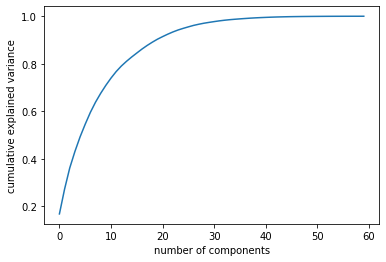

In [43]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [44]:
from sklearn.cluster import KMeans
cl=[5,6,10,15,20,21,22,23,24,25,26,27,28,29,30,32]
for k in cl:
    clust_mod=KMeans(n_clusters=k,max_iter=1000,random_state=0)
    clust_mod.fit(pcadata)
    print(k,silhouette_score(pcadata,clust_mod.labels_))

5 0.2602534016789231
6 0.28243699568263225
10 0.42274351088001594
15 0.5677012986976929
20 0.644102872022149
21 0.6423984971577102
22 0.6652386529415115
23 0.6695683698788089
24 0.6726503996586095
25 0.6766007865779669
26 0.6836792330712202
27 0.6469606688601479
28 0.6880301155476961
29 0.6586151670812574
30 0.695028605594175
32 0.6798796580595184


Silhouette Score for  20 clusters is  0.6393601674637085


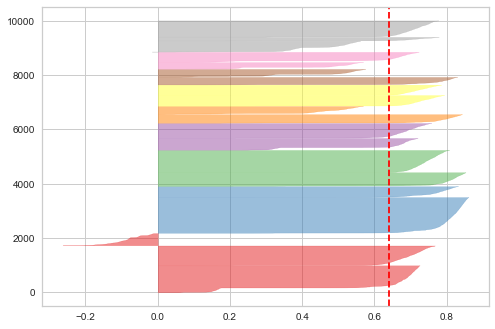

Silhouette Score for  21 clusters is  0.6446656103557828


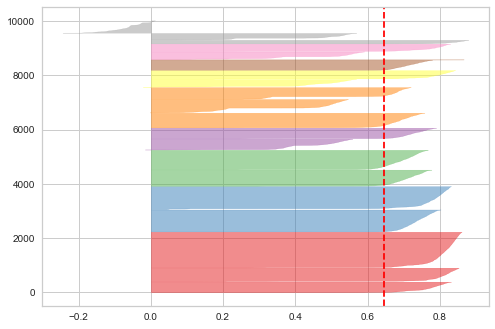

Silhouette Score for  22 clusters is  0.6551354515185456


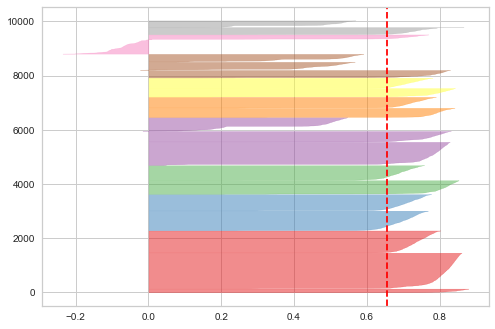

Silhouette Score for  23 clusters is  0.6695683698788089


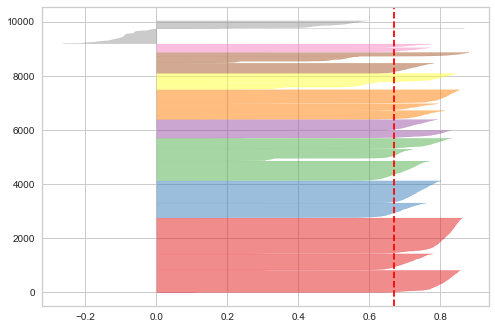

Silhouette Score for  24 clusters is  0.673120647554064


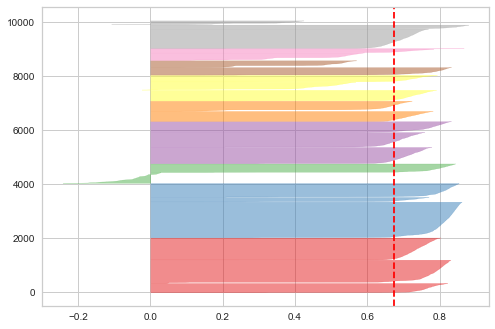

Silhouette Score for  25 clusters is  0.677577749412014


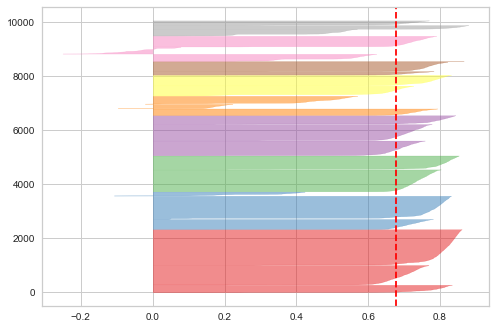

Silhouette Score for  26 clusters is  0.6836792330712202


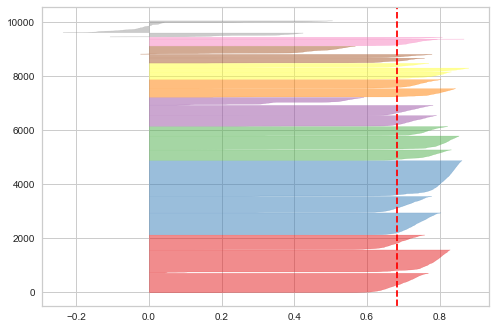

Silhouette Score for  27 clusters is  0.6875990165734064


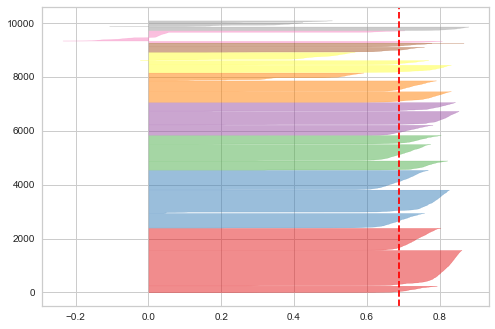

Silhouette Score for  28 clusters is  0.6869663387482102


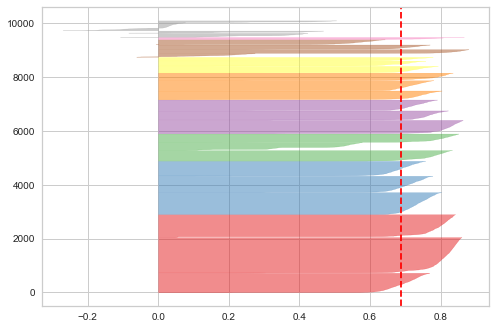

Silhouette Score for  29 clusters is  0.69536528033947


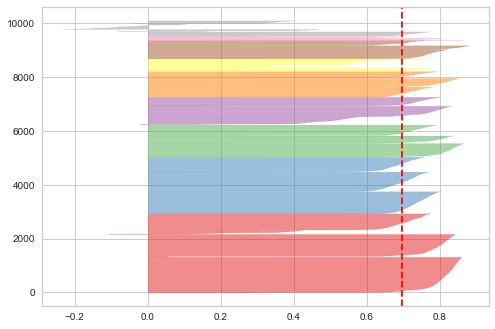

Silhouette Score for  30 clusters is  0.6912022890723553


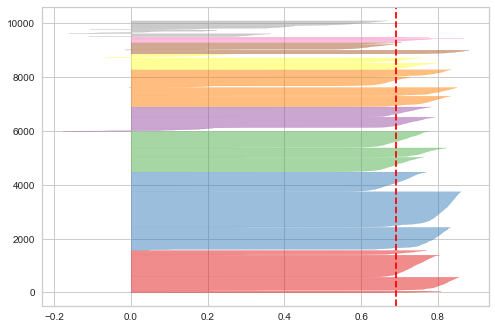

In [46]:
for i in range(20,31):
    km = KMeans(n_clusters=i)
    km.fit(pcadata)
    sil_score = silhouette_score(pcadata, km.labels_)
    
    print('Silhouette Score for ', i , 'clusters is ',sil_score)
    sil_km = SilhouetteVisualizer(km)
    sil_km.fit(pcadata)
    plt.show()

In [47]:
clusters = KMeans(n_clusters = 28, random_state = 10)

# fit the model
clusters.fit(pcadata)

# create a copy of the original dataframe
df_cluster = df_health.copy()


# add the cluster labels as the new column in the dataframe
df_cluster['Cluster'] = clusters.labels_

In [48]:
df_cluster[['SEQN','Cluster']].head(20)

,SEQN,Cluster
0,73557,18
1,73558,16
2,73559,10
3,73560,3
4,73561,4
5,73562,2
6,73563,19
7,73564,7
8,73566,4
9,73567,8


In [49]:
df_cluster['Cluster'].value_counts()

3     1314
1      855
5      809
8      720
2      598
4      543
6      505
14     394
11     390
15     369
9      340
7      325
0      316
16     291
13     286
10     274
24     262
12     242
17     183
20     164
27     146
19     134
18     129
21      60
25      59
22      56
26      45
23       4
Name: Cluster, dtype: int64